## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил: _Колесов Даниил_

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [1]:
from sklearn.neighbors import KDTree
import numpy as np
import pandas as pd

class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        if metric == 'euclid':
            metric = 'minkowski'
        self.metric = metric
        self.k = k
        
        self.X_train = None
        self.y_train = None
        self.tree = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train
        self.y_train = y_train
        self.tree = KDTree(X_train, metric=self.metric)
        
        return self
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        dists, indxs = self.tree.query(X_test, k=self.k)
        weights = dists ** (-1)
        values = [np.sum(self.y_train[indx] * weights) / np.sum(weights) for indx in indxs]
        return np.array(values)
        

In [2]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

my_knn = KNN(metric='euclid')
my_knn.fit(X_train, y_train)
my_pred = my_knn.predict(X_test)

sklearn_knn = KNeighborsRegressor()
sklearn_knn.fit(X_train, y_train)
sklearn_pred = sklearn_knn.predict(X_test)

print('my(euclid):', mean_squared_error(my_pred, y_test))
print('sklearn(euclid):', mean_squared_error(sklearn_pred, y_test))

my_knn = KNN(metric='manhattan')
my_knn.fit(X_train, y_train)
my_pred = my_knn.predict(X_test)

sklearn_knn = KNeighborsRegressor(metric='manhattan')
sklearn_knn.fit(X_train, y_train)
sklearn_pred = sklearn_knn.predict(X_test)

print('my(manhattan):', mean_squared_error(my_pred, y_test))
print('sklearn(manhattan):', mean_squared_error(sklearn_pred, y_test))

my(euclid): 1.1434613710628159
sklearn(euclid): 1.143019350619603
my(manhattan): 1.1765320801645007
sklearn(manhattan): 1.1781020576821544


# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [4]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.n_iterations = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        self.max_iter = max_iter
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (m, d)
        y_train - np.array of shape (m,)
        """

        self.loss_history = []
        self.w = np.zeros((X_train.shape[1], 1))
        m = X_train.shape[0]
        y_train = y_train.reshape((y_train.shape[0], 1))

        for _ in range(self.max_iter):
            y_pred = np.dot(X_train, self.w)
            diffs = abs(y_pred - y_train)
            gradient_vector = np.dot(X_train.T, diffs)
            self.w -= (self.eta / m) * gradient_vector
            flag = (diffs > self.delta)
            cost = (~flag) * (0.5 * diffs ** 2) - (flag) * self.delta * (0.5 * self.delta - diffs)
            self.loss_history.append(cost)
        return self.loss_history

    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return np.dot(X_test, self.w)
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        y = y.reshape((y.shape[0], 1))
        y_pred = np.dot(X, self.w)
        diffs = abs(y_pred - y_train)
        gradient_vector = np.dot(X.T, diffs)
        
        return gradient_vector
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        y = y.reshape((y.shape[0], 1))
        pred = self.predict(X)
        diffs = abs(pred - y)
        flag = (diffs > self.delta)
        return np.sum((~flag) * (0.5 * diffs ** 2) - (flag) * self.delta * (0.5 * self.delta - diffs)) / y.shape[0]

In [5]:
l_reg = LinearRegressionHuber()
l_reg.fit(X_train, y_train)
pred = l_reg.predict(X_test)
print('MSE:',mean_squared_error(pred, y_test))
print('Huber loss:',l_reg.calc_loss(X_test, y_test))
print('Grad:',l_reg.calc_gradient(X_test, y_test))

MSE: 262.5964287679535
Huber loss: 12.217402149562659
Grad: [[ 138.63360335  139.59112202  138.16255389 ...  134.6773695
   140.58599084  136.77970575]
 [ 317.51776854  495.51362238  290.95059637 ...  392.17004594
   576.76867345  469.73248116]
 [  96.2981926   162.03604924   88.83439186 ...  121.25274985
   204.48410996  149.58811   ]
 ...
 [ 343.36448729  405.06990203  334.92693882 ...  366.41678559
   435.50719021  395.70057719]
 [ -65.51180275 -133.71056261  -54.27443826 ...  -99.39747911
  -158.64152768 -123.85424807]
 [ 201.3006253   244.42192565  194.8228709  ...  220.76432707
   250.0542303   240.13350955]]


# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [7]:
data = pd.read_csv('train.csv', header=0)

In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [11]:
data.replace(to_replace='None', value=np.nan, inplace=True)
for i in ['{0}: {1}, {2}'.format(column, data[column].isnull().sum(), data[column].isnull().sum() / data[column].isnull().count()) for column in data.columns]:
    print(i)

MSSubClass: 0, 0.0
MSZoning: 0, 0.0
LotFrontage: 259, 0.1773972602739726
LotArea: 0, 0.0
Street: 0, 0.0
Alley: 1369, 0.9376712328767123
LotShape: 0, 0.0
LandContour: 0, 0.0
Utilities: 0, 0.0
LotConfig: 0, 0.0
LandSlope: 0, 0.0
Neighborhood: 0, 0.0
Condition1: 0, 0.0
Condition2: 0, 0.0
BldgType: 0, 0.0
HouseStyle: 0, 0.0
OverallQual: 0, 0.0
OverallCond: 0, 0.0
YearBuilt: 0, 0.0
YearRemodAdd: 0, 0.0
RoofStyle: 0, 0.0
RoofMatl: 0, 0.0
Exterior1st: 0, 0.0
Exterior2nd: 0, 0.0
MasVnrType: 872, 0.5972602739726027
MasVnrArea: 8, 0.005479452054794521
ExterQual: 0, 0.0
ExterCond: 0, 0.0
Foundation: 0, 0.0
BsmtQual: 37, 0.025342465753424658
BsmtCond: 37, 0.025342465753424658
BsmtExposure: 38, 0.026027397260273973
BsmtFinType1: 37, 0.025342465753424658
BsmtFinSF1: 0, 0.0
BsmtFinType2: 38, 0.026027397260273973
BsmtFinSF2: 0, 0.0
BsmtUnfSF: 0, 0.0
TotalBsmtSF: 0, 0.0
Heating: 0, 0.0
HeatingQC: 0, 0.0
CentralAir: 0, 0.0
Electrical: 1, 0.0006849315068493151
1stFlrSF: 0, 0.0
2ndFlrSF: 0, 0.0
LowQualFin

#### Колонки PoolQC, MiscFeature, Alley не заполнены больше чем на 90%. Fence заполнена на 20%. MasVnrType заполненa на 40% FireplaceQu на 53%

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

#### Колонки, которые зополнены меньше чем на 70% лучше всего удалить из выборки, чтобы не иметь смещения. То есть PoolQC, MiscFeature, Alley, Fence, GarageType, GarageFinish, GarageFinish удаляем

In [12]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

##### Категориальные признаки заполним модой, дискретные медианой, вещественные средним арифметическим

In [13]:
data.LotFrontage.fillna(data.LotFrontage.median(), inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.median(), inplace=True)
data.BsmtQual.fillna(data.BsmtQual.mode()[0], inplace=True)
data.BsmtCond.fillna(data.BsmtCond.mode()[0], inplace=True)
data.BsmtExposure.fillna(data.BsmtExposure.mode()[0], inplace=True)
data.BsmtFinType1.fillna(data.BsmtFinType1.mode()[0], inplace=True)
data.BsmtFinType2.fillna(data.BsmtFinType2.mode()[0], inplace=True)
data.Electrical.fillna(data.Electrical.mode()[0], inplace=True)
data.GarageType.fillna(data.GarageType.mode()[0], inplace=True)
data.GarageYrBlt.fillna(data.GarageYrBlt.median(), inplace=True)
data.GarageFinish.fillna(data.GarageFinish.mode()[0], inplace=True)
data.GarageQual.fillna(data.GarageQual.mode()[0], inplace=True)
data.GarageCond.fillna(data.GarageCond.mode()[0], inplace=True)

data.isna().sum().sum()

0

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [14]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

print(len(categorical_columns))

37


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in categorical_columns:
    le.fit(data[column])
    data[column] = le.transform(data[column])

#### Так как количество категориальных признаков велико и каждый признак имеет от 5 до 25 различных значений, то one-hot-encoding создаст слишком много дополнительных признаков, что приведет к огромному размеру пространства. По данной причине будем использовать label encoding

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

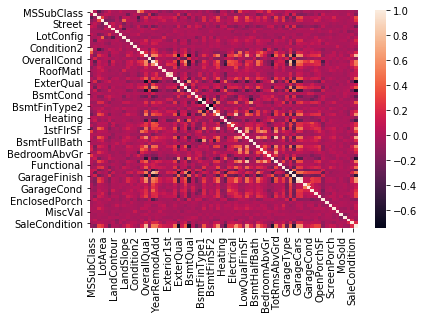

In [16]:
import seaborn
seaborn.heatmap(data.corr())
data.columns

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [17]:
min = abs(data.corr()['SalePrice']).min()
max = abs(data.corr().drop('SalePrice')['SalePrice']).max()
min_feature = abs(data.corr()['SalePrice'])[abs(data.corr()['SalePrice']) == min].index[0]
max_feature = abs(data.corr()['SalePrice'])[abs(data.corr()['SalePrice']) == max].index[0]

print('max_feature:', max_feature, '\nmin_feature:', min_feature)

max_feature: OverallQual 
min_feature: Condition2


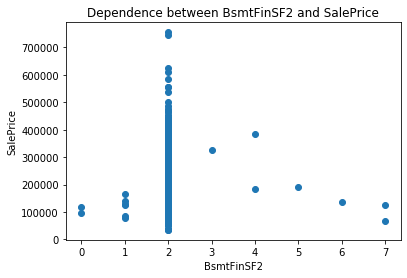

In [18]:
plt.scatter(data[min_feature], data['SalePrice'])
plt.title('Dependence between BsmtFinSF2 and SalePrice')
plt.ylabel('SalePrice')
plt.xlabel('BsmtFinSF2')
plt.show()

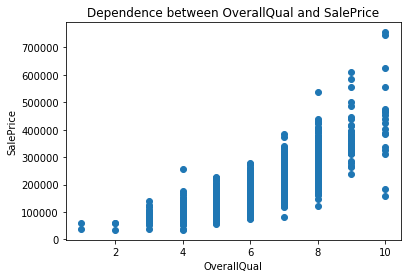

In [19]:
plt.scatter(data[max_feature], data['SalePrice'])
plt.title('Dependence between OverallQual and SalePrice')
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

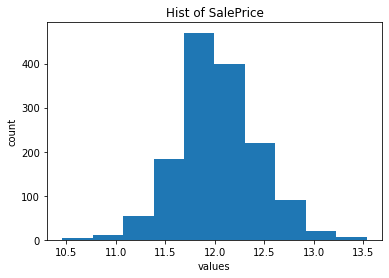

In [20]:
plt.hist(np.log1p(data['SalePrice']))
plt.title('Hist of SalePrice')
plt.xlabel('values')
plt.ylabel('count')
plt.show()

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

## Нормализуем

In [21]:
data=(data-data.min())/(data.max()-data.min())

In [22]:
X = data.drop('SalePrice', axis=1)
y = np.log1p(data['SalePrice'])

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

In [24]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 73), (365, 73), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

## KNN Regressor

In [25]:
gsc_knn = GridSearchCV(estimator=KNeighborsRegressor(),
                      param_grid={
                          'n_neighbors': [i for i in range(100)],
                          'weights': ['uniform', 'distance'],
                          'metric': ['minkowski', 'manhattan']
                      },
                      cv=5, scoring='neg_root_mean_squared_error',
                      verbose=0, n_jobs=-1)

grid_results = gsc_knn.fit(X_train, y_train)
best_params = grid_results.best_params_
knn_reg = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'],
                             weights=best_params['weights'],
                             metric=best_params['metric'])

knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_val)
print(np.sqrt(mean_squared_error(knn_pred, y_val)))

0.0356529378361274


## Linear Regression

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_val)

print(np.sqrt(mean_squared_error(linear_pred, y_val)))

0.03023718222396848


## Lasso

In [27]:
gsc_lasso = GridSearchCV(estimator=Lasso(),
                      param_grid={
                          'alpha': [0.005, 0.02, 0.03, 0.05, 0.06]
                      },
                      cv=5, scoring='neg_root_mean_squared_error',
                      verbose=0, n_jobs=-1)

grid_results = gsc_lasso.fit(X_train, y_train)
best_params = grid_results.best_params_
lasso = Lasso(alpha=best_params['alpha'])

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)
print(np.sqrt(mean_squared_error(lasso_pred, y_val)))

0.050198324862516075


## Ridge 

In [28]:
gsc_ridge = GridSearchCV(estimator=Ridge(),
                      param_grid={
                          'alpha': [550, 580, 600, 620, 650]
                      },
                      cv=5, scoring='neg_root_mean_squared_error',
                      verbose=0, n_jobs=-1)

grid_results = gsc_ridge.fit(X_train, y_train)
best_params = grid_results.best_params_
ridge = Ridge(alpha=best_params['alpha'])

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)
print(np.sqrt(mean_squared_error(ridge_pred, y_val)))

0.05148270962423012


## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

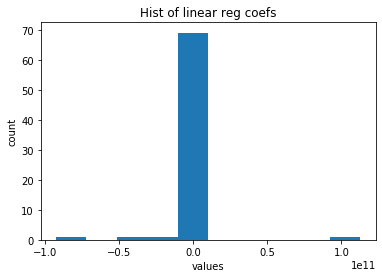

In [29]:
plt.hist(linear_reg.coef_)
plt.title('Hist of linear reg coefs')
plt.xlabel('values')
plt.ylabel('count')
plt.show()

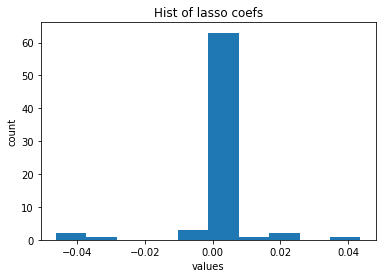

In [30]:
plt.hist(lasso.coef_)
plt.title('Hist of lasso coefs')
plt.xlabel('values')
plt.ylabel('count')
plt.show()

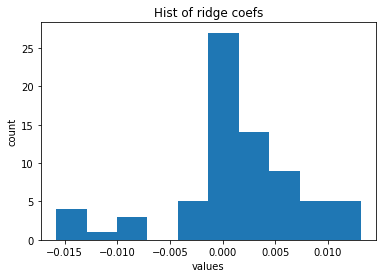

In [31]:
plt.hist(ridge.coef_)
plt.title('Hist of ridge coefs')
plt.xlabel('values')
plt.ylabel('count')
plt.show()

#### Lasso: много коэффициентов приняло значение 0. Диапазон значений меньше чем у линейной регрессии
#### Ridge: имеет самый маленький диапазон коэффициентов, меньше всего коэффициентов равных нулю. Ближе всего к нормальному распределению
#### Linear regression: самый большой диапазон, много выбросов, больше всего нулевых коэффициентов


## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

# Сделано!!!

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

# Сделано!!!

# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

*(your solution here)*